In [3]:
from scipy.stats import friedmanchisquare
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 11.7 MB/s eta 0:00:000:00:01m eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib] 5/6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.4 MB/s eta 0:00:0031m21.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("full_flesch.csv")
print(df.columns)

Index(['Type of advice', 'meta-llama/Llama-3.2-3B-Instruct response - Flesch',
       'google_genai.gemini-2.0-flash-001 response - Flesch',
       'openai.gpt-4.1-mini-2025-04-14 response - Flesch',
       'anthropic.claude-3-7-sonnet-20250219 response - Flesch'],
      dtype='object')


In [5]:
# Select the first 4 columns for the test
columns_to_test = df.columns[:5]

# Drop rows with NaNs in those columns
df_clean = df[columns_to_test].dropna()

# Run Friedman test
statistic, p_value = friedmanchisquare(
    df_clean[columns_to_test[1]],
    df_clean[columns_to_test[2]],
    df_clean[columns_to_test[3]],
    df_clean[columns_to_test[4]],
)

print("Friedman test statistic:", statistic)
print("p-value:", p_value)

Friedman test statistic: 323.90416666666624
p-value: 6.661727464219477e-70


In [92]:
for i in range(1, 5):  # assuming columns_to_test[1] to [4] are valid
    col = columns_to_test[i]
    if col in df.columns:
        avg_score = df[col].mean()
        print(f"Average Flesch score for {col}: {avg_score:.2f}")
    else:
        print(f"Column '{col}' not found in DataFrame.")

Average Flesch score for meta-llama/Llama-3.2-3B-Instruct response - Flesch: 46.60
Average Flesch score for google_genai.gemini-2.0-flash-001 response - Flesch: 45.77
Average Flesch score for openai.gpt-4.1-mini-2025-04-14 response - Flesch: 49.43
Average Flesch score for anthropic.claude-3-7-sonnet-20250219 response - Flesch: 34.27


In [93]:
import pandas as pd
from scipy.stats import wilcoxon
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Load and clean data
df = pd.read_csv("full_flesch.csv")
df.columns = [col.strip() for col in df.columns]
flesch_cols = [col for col in df.columns if 'Flesch' in col]

# Store raw p-values and comparisons
p_values = []
comparisons = []

for col1, col2 in combinations(flesch_cols, 2):
    # Drop rows where either column has NaN
    pair_df = df[[col1, col2]].dropna()

    # If fewer than 1 paired value, skip
    if len(pair_df) < 1:
        p_values.append(float('nan'))
    else:
        stat, p = wilcoxon(pair_df[col1], pair_df[col2])
        p_values.append(p)
    
    comparisons.append((col1, col2))

# Apply Bonferroni correction
_, p_corrected, _, _ = multipletests(p_values, method='bonferroni')

# Print results
print("Pairwise Wilcoxon Signed-Rank Test Results (with Bonferroni correction):\n")
for (model_a, model_b), raw_p, adj_p in zip(comparisons, p_values, p_corrected):
    print(f"{model_a} vs {model_b} | raw p = {raw_p:.4f} | corrected p = {adj_p:.4f}")


Pairwise Wilcoxon Signed-Rank Test Results (with Bonferroni correction):

meta-llama/Llama-3.2-3B-Instruct response - Flesch vs google_genai.gemini-2.0-flash-001 response - Flesch | raw p = 0.2364 | corrected p = 1.0000
meta-llama/Llama-3.2-3B-Instruct response - Flesch vs openai.gpt-4.1-mini-2025-04-14 response - Flesch | raw p = 0.0000 | corrected p = 0.0000
meta-llama/Llama-3.2-3B-Instruct response - Flesch vs anthropic.claude-3-7-sonnet-20250219 response - Flesch | raw p = 0.0000 | corrected p = 0.0000
google_genai.gemini-2.0-flash-001 response - Flesch vs openai.gpt-4.1-mini-2025-04-14 response - Flesch | raw p = 0.0000 | corrected p = 0.0000
google_genai.gemini-2.0-flash-001 response - Flesch vs anthropic.claude-3-7-sonnet-20250219 response - Flesch | raw p = 0.0000 | corrected p = 0.0000
openai.gpt-4.1-mini-2025-04-14 response - Flesch vs anthropic.claude-3-7-sonnet-20250219 response - Flesch | raw p = 0.0000 | corrected p = 0.0000


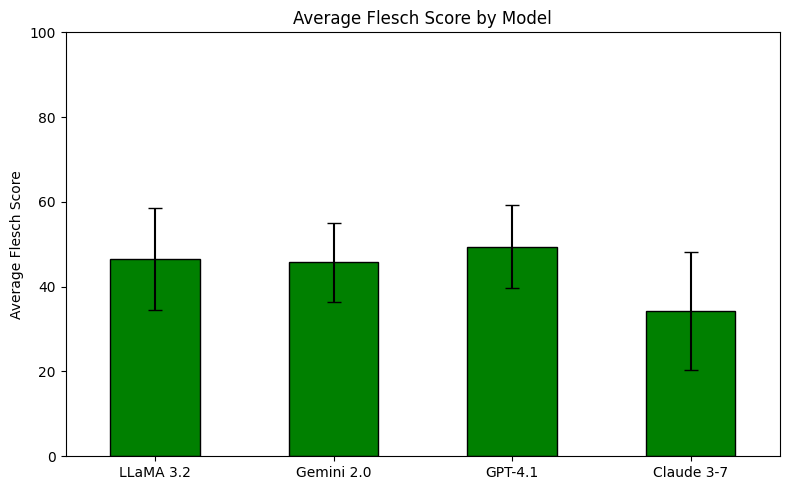

In [94]:
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Rename columns for nicer labels
clean_names = {
    'meta-llama/Llama-3.2-3B-Instruct response - Flesch': 'LLaMA 3.2',
    'google_genai.gemini-2.0-flash-001 response - Flesch': 'Gemini 2.0',
    'openai.gpt-4.1-mini-2025-04-14 response - Flesch': 'GPT-4.1',
    'anthropic.claude-3-7-sonnet-20250219 response - Flesch': 'Claude 3-7'
}
df = df.rename(columns=clean_names)

# Compute means and stds (excluding the first column)
avg_scores = df.iloc[:, 1:].mean()
std_scores = df.iloc[:, 1:].std()

# Plot
plt.figure(figsize=(8, 5))
avg_scores.plot(kind='bar', yerr=std_scores, capsize=5, color='green', edgecolor='black')
plt.ylabel("Average Flesch Score")
plt.title("Average Flesch Score by Model")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [69]:
df = pd.read_csv("full_dale_chall.csv")
print(df.columns)

Index(['Type of advice',
       'meta-llama/Llama-3.2-3B-Instruct response - DaleChall',
       'google_genai.gemini-2.0-flash-001 response - DaleChall',
       'openai.gpt-4.1-mini-2025-04-14 response - DaleChall',
       'anthropic.claude-3-7-sonnet-20250219 response - DaleChall'],
      dtype='object')


In [54]:
# Select the first 4 columns for the test
columns_to_test = df.columns[:5]

# Drop rows with NaNs in those columns
df_clean = df[columns_to_test].dropna()

# Run Friedman test
statistic, p_value = friedmanchisquare(
    df_clean[columns_to_test[1]],
    df_clean[columns_to_test[2]],
    df_clean[columns_to_test[3]],
    df_clean[columns_to_test[4]],
)

print("Friedman test statistic:", statistic)
print("p-value:", p_value)

Friedman test statistic: 323.90416666666624
p-value: 6.661727464219477e-70


In [55]:
import pandas as pd
from scipy.stats import wilcoxon
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Load and clean data
df = pd.read_csv("full_dale_chall.csv")
df.columns = [col.strip() for col in df.columns]

# Store p-values and corresponding model pairs
p_values = []
comparisons = []

# For each pair of models, compute Wilcoxon on non-NaN rows
for col1, col2 in combinations(df.columns, 2):
    pair_df = df[[col1, col2]].dropna()
    
    if len(pair_df) < 1:
        continue  # Skip invalid pairs

    try:
        stat, p = wilcoxon(pair_df[col1], pair_df[col2])
        p_values.append(p)
        comparisons.append((col1, col2))
    except ValueError:
        continue  # skip if all differences are 0 or invalid

# Only correct if we have valid p-values
if p_values:
    _, p_corrected, _, _ = multipletests(p_values, method='bonferroni')

    print("Pairwise Wilcoxon Signed-Rank Test Results (with Bonferroni correction):\n")
    for (model_a, model_b), raw_p, adj_p in zip(comparisons, p_values, p_corrected):
        print(f"{model_a} vs {model_b} | raw p = {raw_p:.4f} | corrected p = {adj_p:.4f}")
else:
    print("No valid p-values to test.")

Pairwise Wilcoxon Signed-Rank Test Results (with Bonferroni correction):

meta-llama/Llama-3.2-3B-Instruct response - DaleChall vs google_genai.gemini-2.0-flash-001 response - DaleChall | raw p = 0.1533 | corrected p = 0.9198
meta-llama/Llama-3.2-3B-Instruct response - DaleChall vs openai.gpt-4.1-mini-2025-04-14 response - DaleChall | raw p = 0.0748 | corrected p = 0.4488
meta-llama/Llama-3.2-3B-Instruct response - DaleChall vs anthropic.claude-3-7-sonnet-20250219 response - DaleChall | raw p = 0.0000 | corrected p = 0.0000
google_genai.gemini-2.0-flash-001 response - DaleChall vs openai.gpt-4.1-mini-2025-04-14 response - DaleChall | raw p = 0.2851 | corrected p = 1.0000
google_genai.gemini-2.0-flash-001 response - DaleChall vs anthropic.claude-3-7-sonnet-20250219 response - DaleChall | raw p = 0.0000 | corrected p = 0.0000
openai.gpt-4.1-mini-2025-04-14 response - DaleChall vs anthropic.claude-3-7-sonnet-20250219 response - DaleChall | raw p = 0.0000 | corrected p = 0.0000


In [88]:


# Clean column names
df.columns = [col.strip() for col in df.columns]

# Rename columns for nicer labels
clean_names = {
    'meta-llama/Llama-3.2-3B-Instruct response - DaleChall': 'LLaMA 3.2',
    'google_genai.gemini-2.0-flash-001 response - DaleChall': 'Gemini 2',
    'openai.gpt-4.1-mini-2025-04-14 response - DaleChall': 'GPT-4.1',
    'anthropic.claude-3-7-sonnet-20250219 response - DaleChall': 'Claude 3-7'
}
df = df.rename(columns=clean_names)

# Compute average sentiment scores
avg_scores = df.mean()
std_scores = df.std()

# Plot
plt.figure(figsize=(8, 5))
avg_scores.plot(kind='bar', yerr=std_scores, capsize=5, color='green', edgecolor='black')
plt.ylabel("Average Dale-Chall Score")
plt.title("Average Dale-Chall Score by Model")
plt.ylim(0, 15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

TypeError: can only concatenate str (not "int") to str

In [61]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


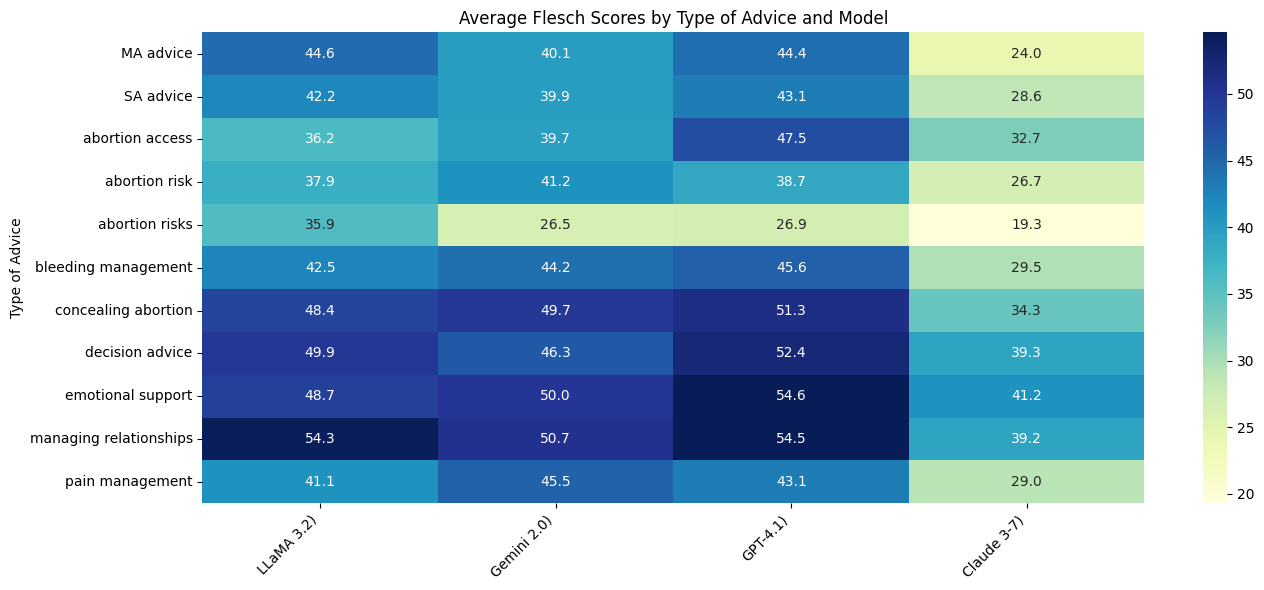

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean column names
df.columns = [col.strip() for col in df.columns]

# Step 2: Set "Type of advice" as index
df_grouped = df.groupby("Type of advice").mean(numeric_only=True)

# Step 3: (Optional) Clean up column labels if needed
# E.g., turn "GPT-4 response - Flesch" into "GPT-4 (Flesch)"
df_grouped.columns = [
    col.replace(" response - ", " (").replace(" score", "") + ")" for col in df_grouped.columns
]

# Step 4: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df_grouped, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Flesch Scores by Type of Advice and Model")
plt.ylabel("Type of Advice")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [82]:
from scipy.stats import friedmanchisquare

# Get all unique advice types
advice_types = df['Type of advice'].unique()

for advice_type in advice_types:
    subset = df[df['Type of advice'] == advice_type]
    
    # Extract Flesch columns for all models
    scores = [
        subset["meta-llama/Llama-3.2-3B-Instruct response - Flesch"],
        subset["google_genai.gemini-2.0-flash-001 response - Flesch"],
        subset["openai.gpt-4.1-mini-2025-04-14 response - Flesch"],
        subset["anthropic.claude-3-7-sonnet-20250219 response - Flesch"],
    ]

    stat, p = friedmanchisquare(*scores)
    print(f"{advice_type}: p = {p:.4f} {'(Significant)' if p < 0.05 else ''}")


managing relationships: p = 0.0000 (Significant)
concealing abortion: p = nan 
emotional support: p = nan 
decision advice: p = nan 
abortion access: p = 0.0384 (Significant)
pain management: p = nan 
SA advice: p = 0.0163 (Significant)
bleeding management: p = 0.0000 (Significant)
abortion risk: p = 0.0040 (Significant)
MA advice: p = 0.0000 (Significant)
abortion risks: p = 0.6149 
nan: p = nan 


/var/folders/kj/cprstf6n7yn7yqq_qjsxx5lm0000gn/T/ipykernel_6726/2480714223.py:17: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = friedmanchisquare(*scores)


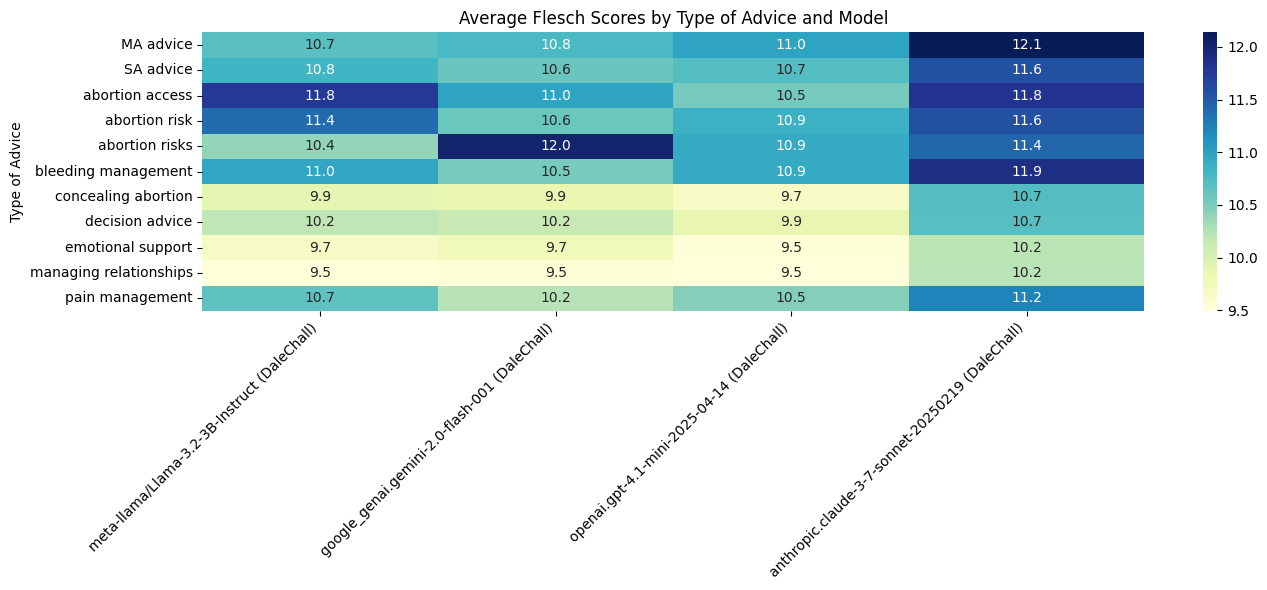

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean column names
df.columns = [col.strip() for col in df.columns]

# Step 2: Set "Type of advice" as index
df_grouped = df.groupby("Type of advice").mean(numeric_only=True)

# Step 3: (Optional) Clean up column labels if needed
# E.g., turn "GPT-4 response - Flesch" into "GPT-4 (Flesch)"
df_grouped.columns = [
    col.replace(" response - ", " (").replace(" score", "") + ")" for col in df_grouped.columns
]

# Step 4: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df_grouped, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Flesch Scores by Type of Advice and Model")
plt.ylabel("Type of Advice")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()